In [16]:
%matplotlib inline
import re
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.constants import hbar, e as eV, c
eh = eV/hbar
import glob
def ri(z): return (z.real, z.imag)
#m = re.compile(r"([^_]+)_r([0-9.]+)nm_")
#removek = re.compile(r"(k\([^)]+\)um-1_)")
#remover = re.compile(r"r[0-9.]+nm_")

In [41]:
allfiles=glob.glob('*cyl*k(0_0)*.npz')
allgraphs=dict()
for f in allfiles:
    base = remover.sub('', f)
    if base in allgraphs.keys():
        allgraphs[base] += 1
    else:
        allgraphs[base] = 1
for k in sorted(allgraphs.keys()):
    print(k, allgraphs[k])

In [42]:
filenames=glob.glob('modes_basis*.npz')
projectors = np.load('projectors_D4h_lMax3.npz')
irlabels = sorted(projectors.keys())
projectors = {f: projectors[f] for f in irlabels}
projectors_list = [projectors[irlabels[i]] for i in range(len(projectors))]

In [43]:
plotdata = []
for file in filenames:
    dat = np.load(file, allow_pickle=True)
    kx = dat['meta'][()]['k'][0]
    b = dat['meta'][()]['band_index']
    eigvals = dat['eigval']
    lMax = dat['meta'][()]['lMax'][None]
    residuals = dat['residuals']
    #print(kx, residuals)
    ef =dat['empty_freqs']
    eigvecs = dat['eigvec']
    if(kx==0):    
        irweights = np.array([np.linalg.norm(np.tensordot(proj, eigvecs, axes=(-1, -1)), axis=0,ord=2) for proj in projectors_list]).T
        irclass = np.argmax(irweights, axis=-1)
    else:
        irweights = None
        irclass = [None] * len(eigvals)
    plotdata.append((kx, eigvals, residuals, b, ef, irclass))


In [63]:
markerdict = {
    4: "3",
    -4: "4",
    3: "^",
    -3: "v",
    -2: 'x',
    2: '+',
    1: 's',
    -1: 'd',
}

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colordict = {i: colors[(i+1)] for i in range(-4,8)}

def markerfun(b):
    if b in markerdict.keys():
        return markerdict[b]
    else: return 'X'

def colorfun(b):
    if (b+1) in colordict.keys():
        return colordict[b+1]
    else: return colordict[0]
    
labeldict = {
    "E'" :    "$E'$",
    "A2''" :  "$A_2''$",
}
def label2latex(label):
    return labeldict[label] if label in labeldict.keys() else label
    

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, None}


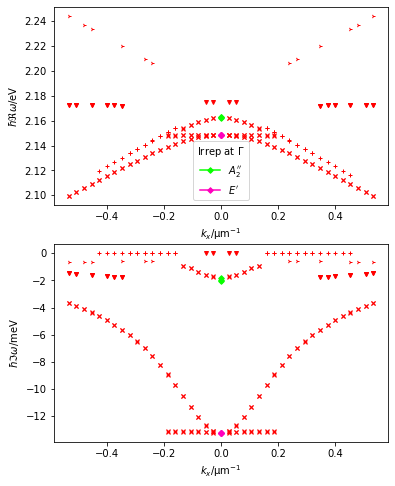

In [64]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(211)

res_thr = 0.1
xlim = [40,200]
plot_irreps = None #{"E''"}


plot_iris=set(range(len(irlabels))) if plot_irreps is None else {iri for iri in range(len(irlabels)) if irlabels[iri] in plot_irreps}
plot_iris |= {None}
print(plot_iris)

ir_labeled=set()
for (kx, eigvals, residuals, b, ef, irclass) in plotdata:
    for i, (e, res, iri) in enumerate(zip(eigvals, residuals, irclass)):
        #if i == 0:
        if iri in plot_iris and res < res_thr:# and e.real < 2.14e15:
            if iri in ir_labeled: 
                label=None
            else:
                ir_labeled.add(iri)
                label=irlabels[iri] if iri is not None else None
            ax.plot(kx/1e6, e.real/eh,
                    marker=markerfun(b) if iri is None else "D",
                    ms=4, #c=colorfun(b)
                    c=matplotlib.cm.hsv(iri/9 if iri is not None else 0),
                    #c = colorfun(iri),
                    label=label2latex(label),
                   )
            #print(kx, abs(e.imag/e.real), res, b)
#for eff in ef:
#    ax.axhline(y= eff/eh)
ax.set_xlabel("$k_x/\mathrm{\mu m^{-1}}$")
ax.set_ylabel('$\hbar \Re \omega / \mathrm{eV}$')
ax.legend(title="Irrep at $\\Gamma$")
#ax.set_ylim([2.075e15,2.085e15])
#ax.set_ylim([1.30, 1.42])
#ax.set_xlim(xlim)

#ax.set_xlim([40,100])
#ax.legend()

ax = fig.add_subplot(212)
ir_labeled=set()
for (kx, eigvals, residuals, b, ef, irclass) in plotdata:
    for i, (e, res, iri) in enumerate(zip(eigvals, residuals, irclass)):
        #if i==0:
        if iri in plot_iris and res < res_thr:# and e.real < 2.14e15:
            if iri in ir_labeled: 
                label=None
            else:
                ir_labeled.add(iri)
                label=irlabels[iri] if iri is not None else None,
            ax.plot(kx/1e6, e.imag/eh*1000, 
                    #marker='x', 
                    #c=colorfun(b), 
                    c=matplotlib.cm.hsv(iri/9 if iri is not None else 0),#colorfun(iri),
                    marker=markerfun(b) if iri is None else "D", ms=4,
                    label=label2latex(label)
                   )
            #print(kx, abs(e.imag/e.real), res, b)
#ax.set_ylim([-15,0])
#ax.set_xlim(xlim)
ax.set_xlabel("$k_x/\mathrm{\mu m^{-1}}$")
ax.set_ylabel('$\hbar \Im \omega / \mathrm{meV}$')
#fig.suptitle('$l_\mathrm{max}=%d$, residual threshold = %g' % (lMax, res_thr) )
#fig.savefig(plotfilename)
#fig.savefig(plotfilename.replace('pdf', 'png'))
fig.savefig("sqlat_beyn_dispersion.pdf")

In [37]:
print (plotdata)

[(-266666.6666666667, array([3.35664512e+15-8.70857302e+11j]), array([0.00326631]), -4, array([5.25951681e+13, 3.25205670e+15, 3.30507039e+15, 3.35724704e+15,
       4.63644226e+15, 4.71082070e+15, 6.55670858e+15, 6.60951301e+15,
       6.66189891e+15, 7.34242136e+15, 7.36605517e+15, 7.41309677e+15,
       7.43650598e+15, 9.30985088e+15, 9.38423109e+15, 9.86136045e+15,
       9.91409513e+15, 9.96655079e+15, 1.04003439e+16, 1.04337140e+16,
       1.04669778e+16, 1.05001361e+16, 1.31660123e+16, 1.32187121e+16,
       1.32712027e+16]), [None]), (400000.0, array([3.30014096e+15-2.51999947e+12j]), array([5.91025308e-05]), -3, array([7.88927521e+13, 3.22575912e+15, 3.30559345e+15, 3.38354462e+15,
       4.61803485e+15, 4.72959810e+15, 6.53041099e+15, 6.60977458e+15,
       6.68819650e+15, 7.31894745e+15, 7.35448284e+15, 7.42504345e+15,
       7.46007348e+15, 9.29134886e+15, 9.40291808e+15, 9.83506287e+15,
       9.91426952e+15, 9.99284837e+15, 1.03754125e+16, 1.04255474e+16,
       1.0475442